In [120]:
%matplotlib notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
usa_df = pd.read_csv("US.csv")
korea_df = pd.read_csv("KR.csv")
iceland_df = pd.read_csv("IS.csv")
australia_df = pd.read_csv("AU.csv")
egypt_df = pd.read_csv("EG.csv")

In [121]:
usa_df['Country'] = "USA"
korea_df['Country'] = "Korea"
iceland_df['Country'] = "Iceland"
australia_df['Country'] = "Australia"
egypt_df['Country'] = "Egypt"

In [122]:
us_kr_df = usa_df.merge(korea_df, how='outer')

In [123]:
ice_aus_df = iceland_df.merge(australia_df, how='outer')

In [124]:
us_kr_ice_aus_df = us_kr_df.merge(ice_aus_df, how='outer')

In [125]:
world_df = us_kr_ice_aus_df.merge(egypt_df, how='outer')

In [126]:
world_df = world_df.drop(columns=['loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit'])
world_df

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,key,Country
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,USA
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,USA
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,USA
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,USA
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,USA
...,...,...,...,...,...,...,...,...,...,...,...
469782,2NnJpRXIlx35Vij3bPZO0h,DAYWALKER! (feat. CORPSE),82,137747,"['Machine Gun Kelly', 'CORPSE']","['6TIYQ3jFPwQSRmorSezPxX', '7yntSJ6uojO3z6GFUV...",2021-03-12,0.632,0.9220,7,Egypt
469783,7J4VKp49Uh2r84SK5pUa0A,Envidioso,70,225974,"['Ozuna', 'Ovi']","['1i8SpTcr7yvPOmcqrbnVXY', '4o0NtnL2m0lzZmEdRa...",2021-04-01,0.799,0.6660,9,Egypt
469784,03B2SfXuvDh1m9F4tqrX07,Skin,82,177500,['Sabrina Carpenter'],['74KM79TiuVKeVCqs8QtB0B'],2021-01-22,0.557,0.4570,7,Egypt
469785,2AceGjiX9isUbXmMZa0Dl1,Floating Through Space,82,177801,"['Sia', 'David Guetta']","['5WUlDfRSoLAfcVSX1WnrxN', '1Cs0zKBU1kc0i8ypK3...",2021-02-04,0.575,0.8440,6,Egypt


In [127]:
def string_split(stringthing):
    try:
        return(stringthing.split('\'')[1].split('\'')[0])
    except:
        return('NA')
world_df['cleaned_artist_id'] = world_df.id_artists.apply(string_split)
world_df

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,key,Country,cleaned_artist_id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,USA,45tIt06XoI0Iio4LBEVpls
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,USA,14jtPCOoNZwquk5wd9DxrY
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,USA,5LiOoJbxVSAMkBS2fUm3X2
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,USA,5LiOoJbxVSAMkBS2fUm3X2
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,USA,3BiJGZsyX9sJchTqcSA7Su
...,...,...,...,...,...,...,...,...,...,...,...,...
469782,2NnJpRXIlx35Vij3bPZO0h,DAYWALKER! (feat. CORPSE),82,137747,"['Machine Gun Kelly', 'CORPSE']","['6TIYQ3jFPwQSRmorSezPxX', '7yntSJ6uojO3z6GFUV...",2021-03-12,0.632,0.9220,7,Egypt,6TIYQ3jFPwQSRmorSezPxX
469783,7J4VKp49Uh2r84SK5pUa0A,Envidioso,70,225974,"['Ozuna', 'Ovi']","['1i8SpTcr7yvPOmcqrbnVXY', '4o0NtnL2m0lzZmEdRa...",2021-04-01,0.799,0.6660,9,Egypt,1i8SpTcr7yvPOmcqrbnVXY
469784,03B2SfXuvDh1m9F4tqrX07,Skin,82,177500,['Sabrina Carpenter'],['74KM79TiuVKeVCqs8QtB0B'],2021-01-22,0.557,0.4570,7,Egypt,74KM79TiuVKeVCqs8QtB0B
469785,2AceGjiX9isUbXmMZa0Dl1,Floating Through Space,82,177801,"['Sia', 'David Guetta']","['5WUlDfRSoLAfcVSX1WnrxN', '1Cs0zKBU1kc0i8ypK3...",2021-02-04,0.575,0.8440,6,Egypt,5WUlDfRSoLAfcVSX1WnrxN


In [128]:
world_df = world_df.drop(columns=['id_artists'])
world_df

,id,name,popularity,duration_ms,artists,release_date,danceability,energy,key,Country,cleaned_artist_id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,['Uli'],1922-02-22,0.645,0.4450,0,USA,45tIt06XoI0Iio4LBEVpls
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,USA,14jtPCOoNZwquk5wd9DxrY
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,USA,5LiOoJbxVSAMkBS2fUm3X2
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,USA,5LiOoJbxVSAMkBS2fUm3X2
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,['Dick Haymes'],1922,0.402,0.1580,3,USA,3BiJGZsyX9sJchTqcSA7Su
...,...,...,...,...,...,...,...,...,...,...,...
469782,2NnJpRXIlx35Vij3bPZO0h,DAYWALKER! (feat. CORPSE),82,137747,"['Machine Gun Kelly', 'CORPSE']",2021-03-12,0.632,0.9220,7,Egypt,6TIYQ3jFPwQSRmorSezPxX
469783,7J4VKp49Uh2r84SK5pUa0A,Envidioso,70,225974,"['Ozuna', 'Ovi']",2021-04-01,0.799,0.6660,9,Egypt,1i8SpTcr7yvPOmcqrbnVXY
469784,03B2SfXuvDh1m9F4tqrX07,Skin,82,177500,['Sabrina Carpenter'],2021-01-22,0.557,0.4570,7,Egypt,74KM79TiuVKeVCqs8QtB0B
469785,2AceGjiX9isUbXmMZa0Dl1,Floating Through Space,82,177801,"['Sia', 'David Guetta']",2021-02-04,0.575,0.8440,6,Egypt,5WUlDfRSoLAfcVSX1WnrxN


In [129]:
artist_df = pd.read_csv("artists.csv")
artist_df

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [130]:
artist_df = artist_df.drop(columns=['followers','popularity'])
artist_df

,id,genres,name
0,0DheY5irMjBUeLybbCUEZ2,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani
1,0DlhY15l3wsrnlfGio2bjU,[],ปูนา ภาวิณี
2,0DmRESX2JknGPQyO15yxg7,[],Sadaa
3,0DmhnbHjm1qw6NCYPeZNgJ,[],Tra'gruda
4,0Dn11fWM7vHQ3rinvWEl4E,[],Ioannis Panoutsopoulos
...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,[],Cody Longo
1104345,1ljurfXKPlGncNdW3J8zJ8,['deep acoustic pop'],Right the Stars
1104346,2vnT9YhKIvjVo9LnVjWmr2,[],Jesse Giddings
1104347,3ID0E5XCvnJIYZEq043ZoB,[],The Boy Band Project


In [131]:
artist_df['genres'].replace('[]', np.nan, inplace=True)
artist_df

,id,genres,name
0,0DheY5irMjBUeLybbCUEZ2,NaN,Armid & Amir Zare Pashai feat. Sara Rouzbehani
1,0DlhY15l3wsrnlfGio2bjU,NaN,ปูนา ภาวิณี
2,0DmRESX2JknGPQyO15yxg7,NaN,Sadaa
3,0DmhnbHjm1qw6NCYPeZNgJ,NaN,Tra'gruda
4,0Dn11fWM7vHQ3rinvWEl4E,NaN,Ioannis Panoutsopoulos
...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,NaN,Cody Longo
1104345,1ljurfXKPlGncNdW3J8zJ8,['deep acoustic pop'],Right the Stars
1104346,2vnT9YhKIvjVo9LnVjWmr2,NaN,Jesse Giddings
1104347,3ID0E5XCvnJIYZEq043ZoB,NaN,The Boy Band Project


In [132]:
artist_df.dropna(subset=['genres'], inplace=True)
artist_df

,id,genres,name
45,0VLMVnVbJyJ4oyZs2L3Yl2,['carnaval cadiz'],Las Viudas De Los Bisabuelos
46,0dt23bs4w8zx154C5xdVyl,['carnaval cadiz'],Los De Capuchinos
47,0pGhoB99qpEJEsBQxgaskQ,['carnaval cadiz'],Los “Pofesionales”
48,3HDrX2OtSuXLW5dLR85uN3,['carnaval cadiz'],Los Que No Paran De Rajar
136,22mLrN5fkppmuUPsHx6i2G,"['classical harp', 'harp']",Vera Dulova
...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,"['social media pop', 'teen pop']",Brent Rivera
1104331,4fh2BIKYPFvXFsQLhaeVJp,['la indie'],Lone Kodiak
1104334,7akMsd2vb4xowNTehv3gsY,['indie rockism'],The Str!ke
1104336,35m7AJrUCtHYHyIUhCzmgi,['indie rockism'],Hunter Fraser


In [133]:
artist_df = artist_df.rename(columns={"id": "cleaned_artist_id"})
artist_df

,cleaned_artist_id,genres,name
45,0VLMVnVbJyJ4oyZs2L3Yl2,['carnaval cadiz'],Las Viudas De Los Bisabuelos
46,0dt23bs4w8zx154C5xdVyl,['carnaval cadiz'],Los De Capuchinos
47,0pGhoB99qpEJEsBQxgaskQ,['carnaval cadiz'],Los “Pofesionales”
48,3HDrX2OtSuXLW5dLR85uN3,['carnaval cadiz'],Los Que No Paran De Rajar
136,22mLrN5fkppmuUPsHx6i2G,"['classical harp', 'harp']",Vera Dulova
...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,"['social media pop', 'teen pop']",Brent Rivera
1104331,4fh2BIKYPFvXFsQLhaeVJp,['la indie'],Lone Kodiak
1104334,7akMsd2vb4xowNTehv3gsY,['indie rockism'],The Str!ke
1104336,35m7AJrUCtHYHyIUhCzmgi,['indie rockism'],Hunter Fraser


In [134]:
artist_df = artist_df.drop(columns=['name'])
artist_df

,cleaned_artist_id,genres
45,0VLMVnVbJyJ4oyZs2L3Yl2,['carnaval cadiz']
46,0dt23bs4w8zx154C5xdVyl,['carnaval cadiz']
47,0pGhoB99qpEJEsBQxgaskQ,['carnaval cadiz']
48,3HDrX2OtSuXLW5dLR85uN3,['carnaval cadiz']
136,22mLrN5fkppmuUPsHx6i2G,"['classical harp', 'harp']"
...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,"['social media pop', 'teen pop']"
1104331,4fh2BIKYPFvXFsQLhaeVJp,['la indie']
1104334,7akMsd2vb4xowNTehv3gsY,['indie rockism']
1104336,35m7AJrUCtHYHyIUhCzmgi,['indie rockism']


In [135]:
cleaned_world_df = world_df.merge(artist_df, how='inner')
cleaned_world_df

,id,name,popularity,duration_ms,artists,release_date,danceability,energy,key,Country,cleaned_artist_id,genres
0,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
1,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
2,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,['Ignacio Corsini'],1922-03-29,0.548,0.0391,6,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
3,0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,0,153533,['Ignacio Corsini'],1922-03-21,0.370,0.3720,2,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
4,0xJCJ9XSNcdTIz0QKmhtEn,La Maleva - Remasterizado,0,181440,['Ignacio Corsini'],1922-03-29,0.339,0.0958,8,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
...,...,...,...,...,...,...,...,...,...,...,...,...
402537,4KXtFUFmPObTROXShFLHZX,"Ajena (with Myke Towers, Dylan Fuentes)",73,162902,"['Dayme y El High', 'Myke Towers', 'Dylan Fuen...",2019-04-16,0.701,0.6040,0,Egypt,4JreHVYyb6GqE2BU03Kx96,"['perreo', 'reggaeton', 'reggaeton flow', 'tra..."
402538,2xI3RDrXPxdHD7Ij4m4G95,ไม่อยู่ในชีวิตแต่อยู่ในหัวใจ,6,258750,['Lula'],2019-11-14,0.634,0.4800,9,Egypt,6Gymwy9eHYItH2v7MYPRjB,['thai pop']
402539,6tCssnvTUREcperDOUTqvA,WANNABE,78,191242,['ITZY'],2020-03-09,0.809,0.9110,6,Egypt,2KC9Qb60EaY0kW4eH68vr3,['k-pop girl group']
402540,4ecVWqbtW6phQGpZMAyqIU,Not Shy,77,177728,['ITZY'],2020-08-17,0.776,0.9110,2,Egypt,2KC9Qb60EaY0kW4eH68vr3,['k-pop girl group']


In [136]:
cleaned_world_df["release_date"] = pd.to_datetime(cleaned_world_df["release_date"],format = '%Y-%m-%d')
cleaned_world_df

,id,name,popularity,duration_ms,artists,release_date,danceability,energy,key,Country,cleaned_artist_id,genres
0,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
1,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
2,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,['Ignacio Corsini'],1922-03-29,0.548,0.0391,6,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
3,0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,0,153533,['Ignacio Corsini'],1922-03-21,0.370,0.3720,2,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
4,0xJCJ9XSNcdTIz0QKmhtEn,La Maleva - Remasterizado,0,181440,['Ignacio Corsini'],1922-03-29,0.339,0.0958,8,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
...,...,...,...,...,...,...,...,...,...,...,...,...
402537,4KXtFUFmPObTROXShFLHZX,"Ajena (with Myke Towers, Dylan Fuentes)",73,162902,"['Dayme y El High', 'Myke Towers', 'Dylan Fuen...",2019-04-16,0.701,0.6040,0,Egypt,4JreHVYyb6GqE2BU03Kx96,"['perreo', 'reggaeton', 'reggaeton flow', 'tra..."
402538,2xI3RDrXPxdHD7Ij4m4G95,ไม่อยู่ในชีวิตแต่อยู่ในหัวใจ,6,258750,['Lula'],2019-11-14,0.634,0.4800,9,Egypt,6Gymwy9eHYItH2v7MYPRjB,['thai pop']
402539,6tCssnvTUREcperDOUTqvA,WANNABE,78,191242,['ITZY'],2020-03-09,0.809,0.9110,6,Egypt,2KC9Qb60EaY0kW4eH68vr3,['k-pop girl group']
402540,4ecVWqbtW6phQGpZMAyqIU,Not Shy,77,177728,['ITZY'],2020-08-17,0.776,0.9110,2,Egypt,2KC9Qb60EaY0kW4eH68vr3,['k-pop girl group']


In [137]:
year = pd.DatetimeIndex(cleaned_world_df['release_date']).year
year

Int64Index([1922, 1922, 1922, 1922, 1922, 1922, 1922, 1922, 1922, 1922,
            ...
            2016, 2017, 2017, 2017, 2018, 2019, 2019, 2020, 2020, 2020],
           dtype='int64', name='release_date', length=402542)

In [138]:
cleaned_world_df["Year"] = year
cleaned_world_df

,id,name,popularity,duration_ms,artists,release_date,danceability,energy,key,Country,cleaned_artist_id,genres,Year
0,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
1,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
2,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,['Ignacio Corsini'],1922-03-29,0.548,0.0391,6,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
3,0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,0,153533,['Ignacio Corsini'],1922-03-21,0.370,0.3720,2,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
4,0xJCJ9XSNcdTIz0QKmhtEn,La Maleva - Remasterizado,0,181440,['Ignacio Corsini'],1922-03-29,0.339,0.0958,8,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402537,4KXtFUFmPObTROXShFLHZX,"Ajena (with Myke Towers, Dylan Fuentes)",73,162902,"['Dayme y El High', 'Myke Towers', 'Dylan Fuen...",2019-04-16,0.701,0.6040,0,Egypt,4JreHVYyb6GqE2BU03Kx96,"['perreo', 'reggaeton', 'reggaeton flow', 'tra...",2019
402538,2xI3RDrXPxdHD7Ij4m4G95,ไม่อยู่ในชีวิตแต่อยู่ในหัวใจ,6,258750,['Lula'],2019-11-14,0.634,0.4800,9,Egypt,6Gymwy9eHYItH2v7MYPRjB,['thai pop'],2019
402539,6tCssnvTUREcperDOUTqvA,WANNABE,78,191242,['ITZY'],2020-03-09,0.809,0.9110,6,Egypt,2KC9Qb60EaY0kW4eH68vr3,['k-pop girl group'],2020
402540,4ecVWqbtW6phQGpZMAyqIU,Not Shy,77,177728,['ITZY'],2020-08-17,0.776,0.9110,2,Egypt,2KC9Qb60EaY0kW4eH68vr3,['k-pop girl group'],2020


In [139]:
#usa_df['Country'] = "USA"
#korea_df['Country'] = "Korea"
#iceland_df['Country'] = "Iceland"
#australia_df['Country'] = "Australia"
#egypt_df['Country'] = "Egypt"

In [140]:
us_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "USA")]
us_data
avg_us = us_data.groupby(["Year"])["danceability"].mean()
avg_us2 = us_data.groupby(["Year"])["energy"].mean()
#-------------
korea_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "Korea")]
korea_data
avg_kor = korea_data.groupby(["Year"])["danceability"].mean()
avg_kor2 = korea_data.groupby(["Year"])["energy"].mean()
#-------------
iceland_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "Iceland")]
iceland_data
avg_ice = iceland_data.groupby(["Year"])["danceability"].mean()
#-------------
aus_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "Australia")]
aus_data
avg_aus = aus_data.groupby(["Year"])["danceability"].mean()
#-------------
egypt_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "Egypt")]
#egypt_data
avg_egypt = egypt_data.groupby(["Year"])["danceability"].mean()
#-------------


<IPython.core.display.Javascript object>


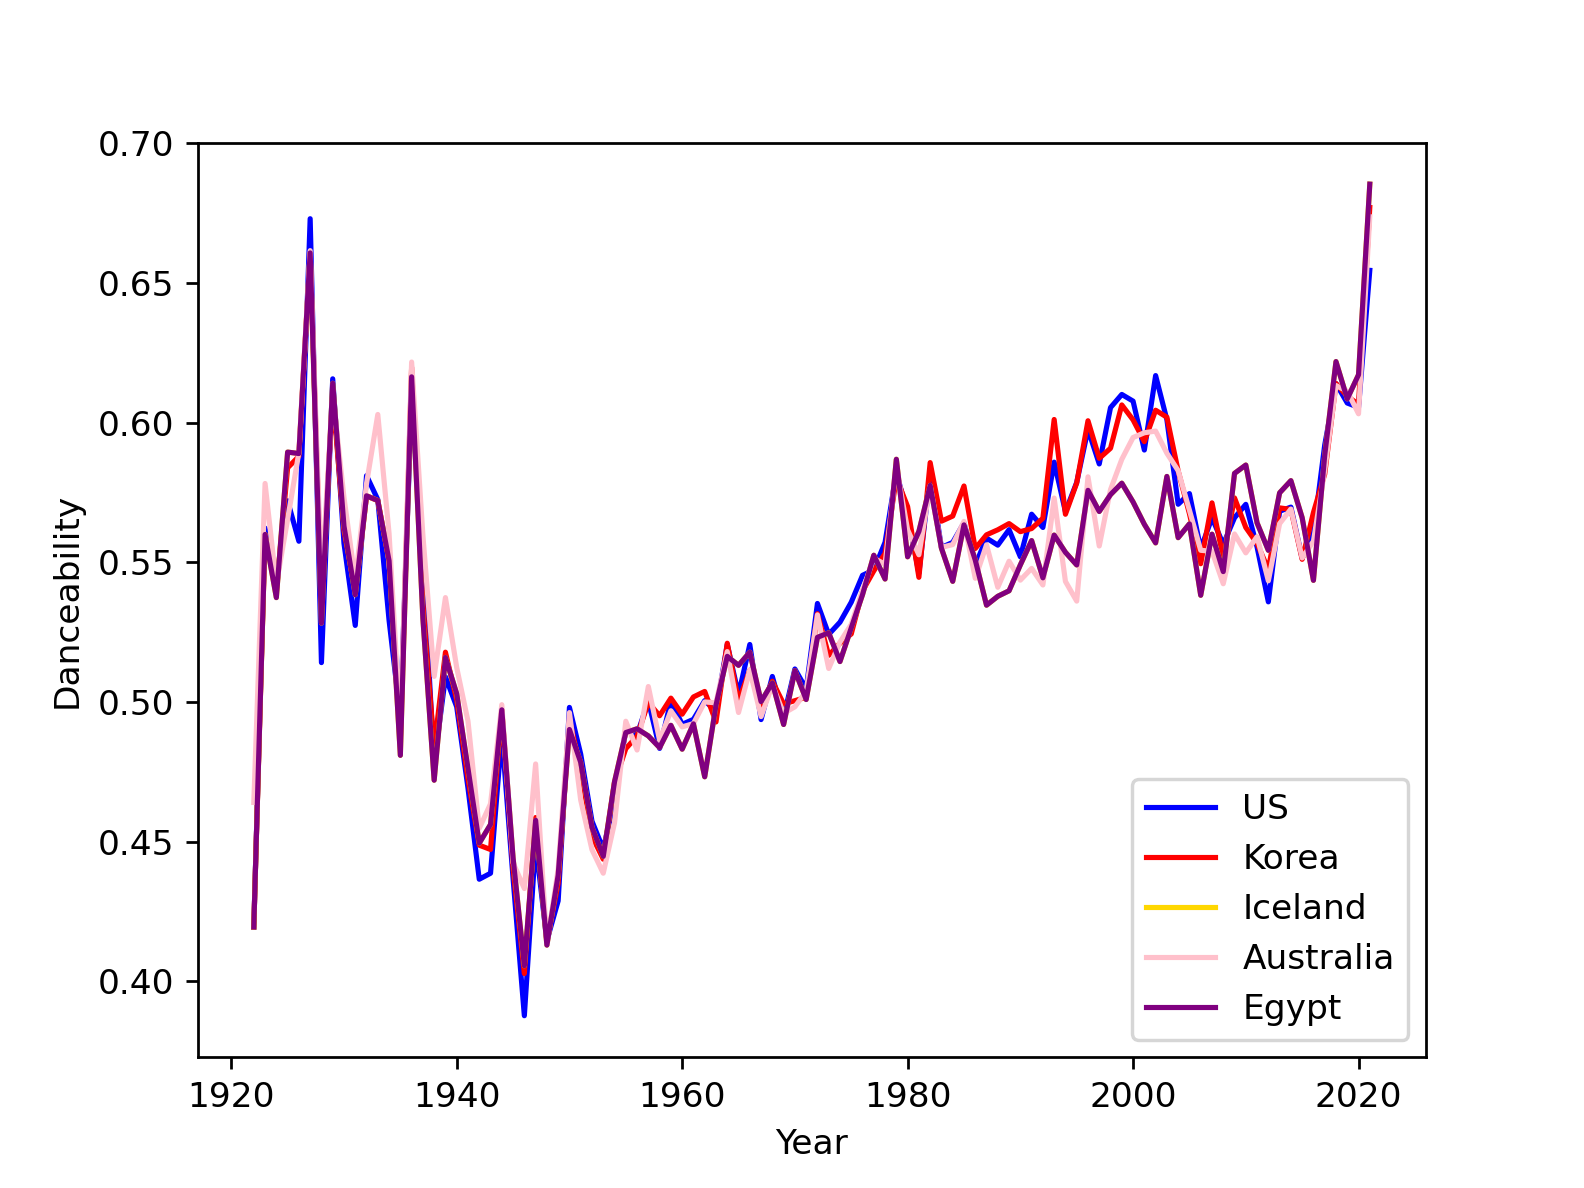

In [141]:
#danceability line plot
us_handle, = plt.plot( avg_us.index.values,avg_us.values,  color='blue', label="US")
korea_handle, = plt.plot(avg_kor.index.values,avg_kor.values,  color='red', label="Korea")
iceland_handle, = plt.plot(avg_ice.index.values,avg_ice.values,  color='gold', label="Iceland")
australia_handle, = plt.plot(avg_aus.index.values,avg_aus.values,  color='pink', label="Australia")
egypt_handle, = plt.plot(avg_ice.index.values,avg_ice.values, color='purple', label="Egypt")

In [142]:
plt.legend(loc="lower right")

plt.xlabel("Year")
plt.ylabel("Danceability")
plt.show()

In [143]:
#energy line plot
#avg_us2.plot(kind ="line",color = "green")


#us2_handle, = plt.plot( avg_us2.index.values,avg_us2.values, marker ='o', color='blue', label="US")
#korea2_handle, = plt.plot(avg_kor2.index.values,avg_kor2.values, marker='^', color='red', label="Korea")
#plt.legend(loc="lower right")
plt.show()